## Praca domowa 4

#### Autor: Jan Kruszewski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a)

In [3]:
df1 = df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b)

In [4]:
df2 = df.loc[df.Year == 2010].groupby("Genre").Global_Sales.agg("sum").head(1)
df2

Genre
Action    117.64
Name: Global_Sales, dtype: float64

Odp.: Gry akcji

c)

In [5]:
df3 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].agg("mean")
df3 = df3.loc[df3.JP_Sales > df3.EU_Sales].sort_values("JP_Sales", ascending = False).iloc[:,0:1].reset_index()
df3 = df3.rename(columns = {'Genre' : "Typ Gry", 'JP_Sales': "Średnia sprzedaż w Japonii"})
df3

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### oryginalny wykres
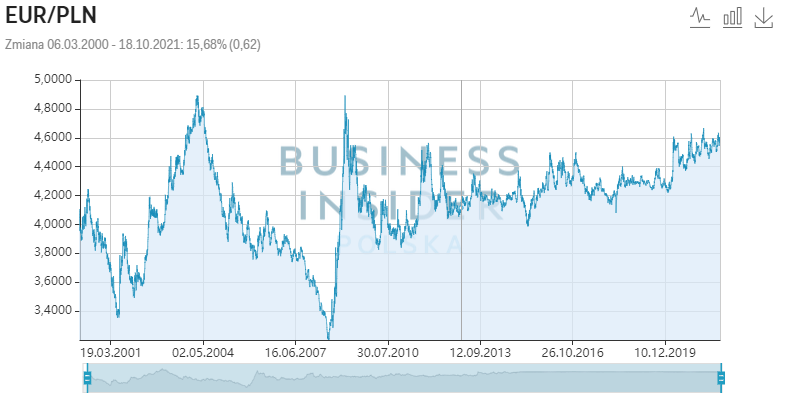
Źródło : https://businessinsider.com.pl/finanse/waluty/kurs-euro-eurpln-notowania-walut-28-pazdziernika-2021/29ljl65

### wykres w ggplot2
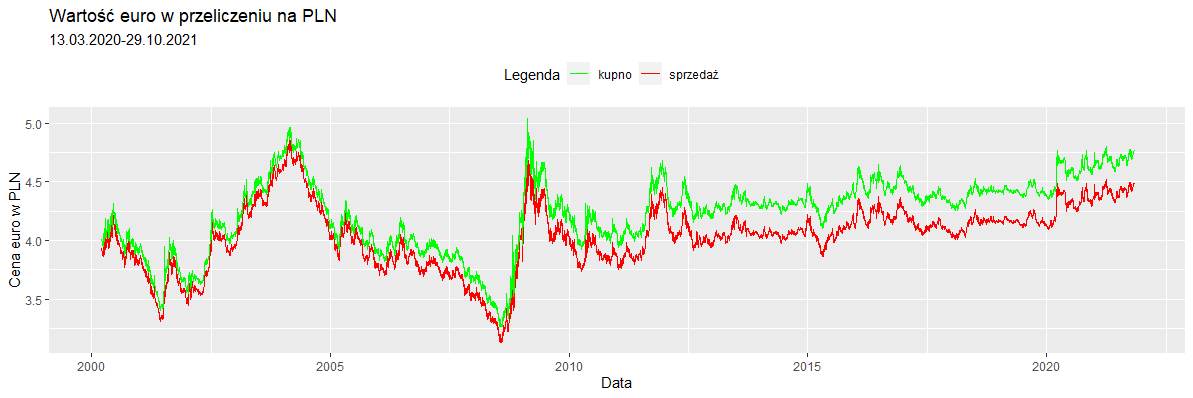
Link do raportu: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/Kruszewski_Jan/twd_pdw_JanKruszewski.html

### wykres w Pythonie

##### Przygotowanie tabelki

In [6]:
df4 = pd.read_csv('\\Users\\Admin\\Downloads\\EUR.csv',
                delimiter = ",").dropna().reset_index(drop = True)
df4 = df4["Data;EUR (Cena kupna);EUR (Cena sprzedazy);EURO"].str.split(";", n = 3, expand = True)
new = df4.rename(columns = {"0" : "data", "1" : "sprzedaż", "2" : "kupno"})
df4["sprzedaz"] = new[1]
df4["kupno"] = new[2]
df4["data"] = new[0]
df4 = df4.iloc[:,3:]
df4["sprzedaz"] = pd.to_numeric(df4["sprzedaz"])
df4["kupno"] = pd.to_numeric(df4["kupno"])
df4["data"] = pd.to_datetime(df4["data"], format = "%Y-%m-%d %H:%M:%S")

##### Generowanie wykresu

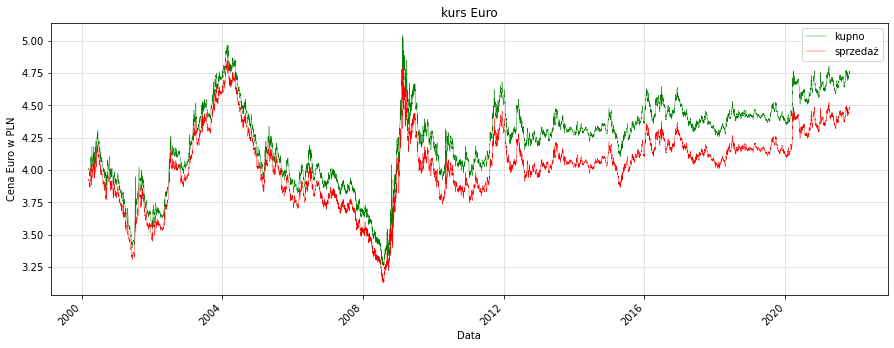

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data = df4, x = "data", y = "kupno", color = 'green', linestyle='dashed',
     linewidth=0.4, label = "kupno")
sns.lineplot(data = df4, x = "data", y = "sprzedaz", color = 'red', linewidth=0.4, label = "sprzedaż")
plt.xticks(rotation=45, ha='right');
plt.title('kurs Euro')
plt.ylabel("Cena Euro w PLN")
plt.xlabel("Data")
plt.grid(linewidth = 0.5, linestyle = '--')
fig = plt.gcf()
fig.set_size_inches(15, 5)


### Wyższość wykresu nad pozostałymi
Ostateczny wykres jest najbardziej czytelny ze wszystkich. Nie posiada mylących napisów. Posiada zarówno zmianę w czasie cenny Euro przy kupnie jak i sprzedaży oraz odpowiednią legędę. Jego przewagą nad wykresem z ggplota jest białe tło z delikatną, przerywaną siatką nie zaburzającą odczytu wykresu.